## Loading Libraries

In [ ]:
from math import sqrt
from pandas_datareader import data 
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import datetime as dt
from datetime import date
import urllib.request,json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

## Data Loading

In [ ]:
!wget https://datahack-prod.s3.amazonaws.com/train_file/Train_aO7sTW8.zip
!wget https://datahack-prod.s3.amazonaws.com/test_file/Test_H6bikL1.zip
!unzip Train_aO7sTW8.zip
!unzip Test_H6bikL1.zip

--2020-10-25 17:27:21--  https://datahack-prod.s3.amazonaws.com/train_file/Train_aO7sTW8.zip
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.80
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5239538 (5.0M) [application/zip]
Saving to: ‘Train_aO7sTW8.zip’

Train_aO7sTW8.zip   100%[===================>]   5.00M  2.70MB/s    in 1.8s    

2020-10-25 17:27:24 (2.70 MB/s) - ‘Train_aO7sTW8.zip’ saved [5239538/5239538]

--2020-10-25 17:27:24--  https://datahack-prod.s3.amazonaws.com/test_file/Test_H6bikL1.zip
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.80
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2194862 (2.1M) [application/zip]
Saving to: ‘Test_H6bikL1.zip’

Test_H6bikL1.zip 

In [ ]:
dtrain=pd.read_csv('/content/Train.csv')
dtest=pd.read_csv('/content/Test.csv')
dtr=dtrain.copy()

In [ ]:
dtrain['ABSTRACT'][1]

"we propose the framework considering optimal $t$-matchings excluding a prescribed $t$-factors inside bipartite graphs. a proposed framework was the generalization of a nonbipartite matching problem and includes several problems, such as a triangle-free $2$-matching, square-free $2$-matching, even factor, and arborescence problems. inside this paper, we demonstrate the unified understanding of these problems by commonly extending previous important results. we solve our problem under the reasonable assumption, which was sufficiently broad to include a specific problems listed above. we first present the min-max theorem and the combinatorial algorithm considering a unweighted version. we then provide the linear programming formulation with dual integrality and the primal-dual algorithm considering a weighted version. the key ingredient of a proposed algorithm was the technique to shrink forbidden structures, which corresponds to a techniques of shrinking odd cycles, triangles, squares, 

## Data Statistics

In [ ]:
dtrain.shape,dtest.shape

((14004, 31), (6002, 6))

In [ ]:
dtrain.head()

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,Computation and Language,Computer Vision and Pattern Recognition,Cosmology and Nongalactic Astrophysics,Data Structures and Algorithms,Differential Geometry,Earth and Planetary Astrophysics,Fluid Dynamics,Information Theory,Instrumentation and Methods for Astrophysics,Machine Learning,Materials Science,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dtest.head()

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics
0,9409,fundamental frequency (f0) approximation from ...,0,0,0,1
1,17934,"this large-scale study, consisting of 24.5 mil...",1,0,0,1
2,16071,we present a stability analysis of the plane c...,0,0,1,0
3,16870,we construct finite time blow-up solutions to ...,0,1,0,0
4,10496,planetary nebulae (pne) constitute an importan...,0,0,1,0


In [ ]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14004 entries, 0 to 14003
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   id                                            14004 non-null  int64 
 1   ABSTRACT                                      14004 non-null  object
 2   Computer Science                              14004 non-null  int64 
 3   Mathematics                                   14004 non-null  int64 
 4   Physics                                       14004 non-null  int64 
 5   Statistics                                    14004 non-null  int64 
 6   Analysis of PDEs                              14004 non-null  int64 
 7   Applications                                  14004 non-null  int64 
 8   Artificial Intelligence                       14004 non-null  int64 
 9   Astrophysics of Galaxies                      14004 non-null  int64 
 10

In [ ]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6002 entries, 0 to 6001
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                6002 non-null   int64 
 1   ABSTRACT          6002 non-null   object
 2   Computer Science  6002 non-null   int64 
 3   Mathematics       6002 non-null   int64 
 4   Physics           6002 non-null   int64 
 5   Statistics        6002 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 281.5+ KB


In [ ]:
dtrain.isnull().sum()

id                                              0
ABSTRACT                                        0
Computer Science                                0
Mathematics                                     0
Physics                                         0
Statistics                                      0
Analysis of PDEs                                0
Applications                                    0
Artificial Intelligence                         0
Astrophysics of Galaxies                        0
Computation and Language                        0
Computer Vision and Pattern Recognition         0
Cosmology and Nongalactic Astrophysics          0
Data Structures and Algorithms                  0
Differential Geometry                           0
Earth and Planetary Astrophysics                0
Fluid Dynamics                                  0
Information Theory                              0
Instrumentation and Methods for Astrophysics    0
Machine Learning                                0


In [ ]:
dtest.isnull().sum()

id                  0
ABSTRACT            0
Computer Science    0
Mathematics         0
Physics             0
Statistics          0
dtype: int64

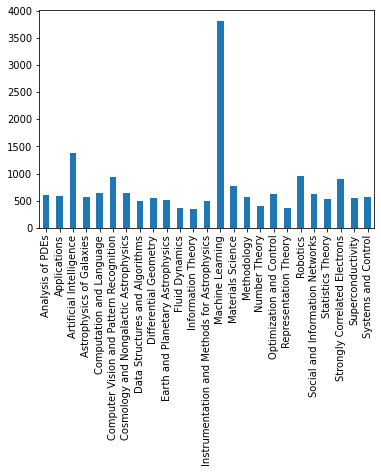

In [ ]:
dtrain.loc[:,'Analysis of PDEs':].sum().plot(kind='bar')

In [ ]:
dtrain.loc[:,'Analysis of PDEs':].sum().sort_values(ascending=False)

Machine Learning                                3825
Artificial Intelligence                         1376
Robotics                                         954
Computer Vision and Pattern Recognition          939
Strongly Correlated Electrons                    893
Materials Science                                775
Computation and Language                         645
Cosmology and Nongalactic Astrophysics           633
Optimization and Control                         621
Social and Information Networks                  619
Analysis of PDEs                                 607
Applications                                     592
Astrophysics of Galaxies                         574
Methodology                                      574
Systems and Control                              566
Differential Geometry                            555
Superconductivity                                542
Statistics Theory                                531
Earth and Planetary Astrophysics              

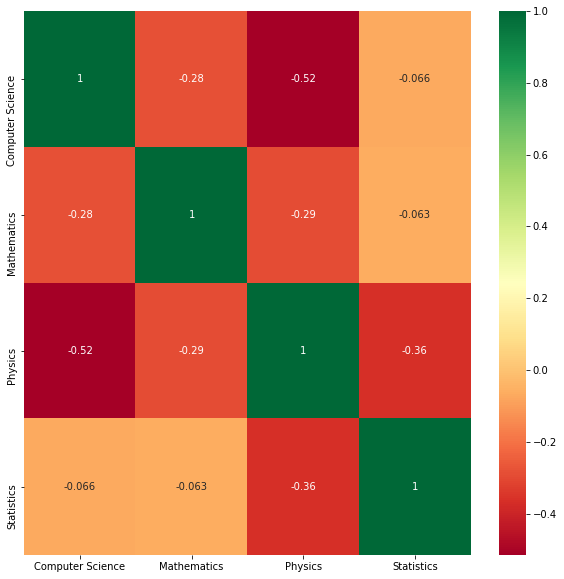

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = dtrain.loc[:,'Computer Science':'Statistics'].corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(dtrain[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Some inferences

Physics and CS have excellent negative correlation.

Physics and Statistics have good negative correlation.

Mathematics is related to both Physics and CS.


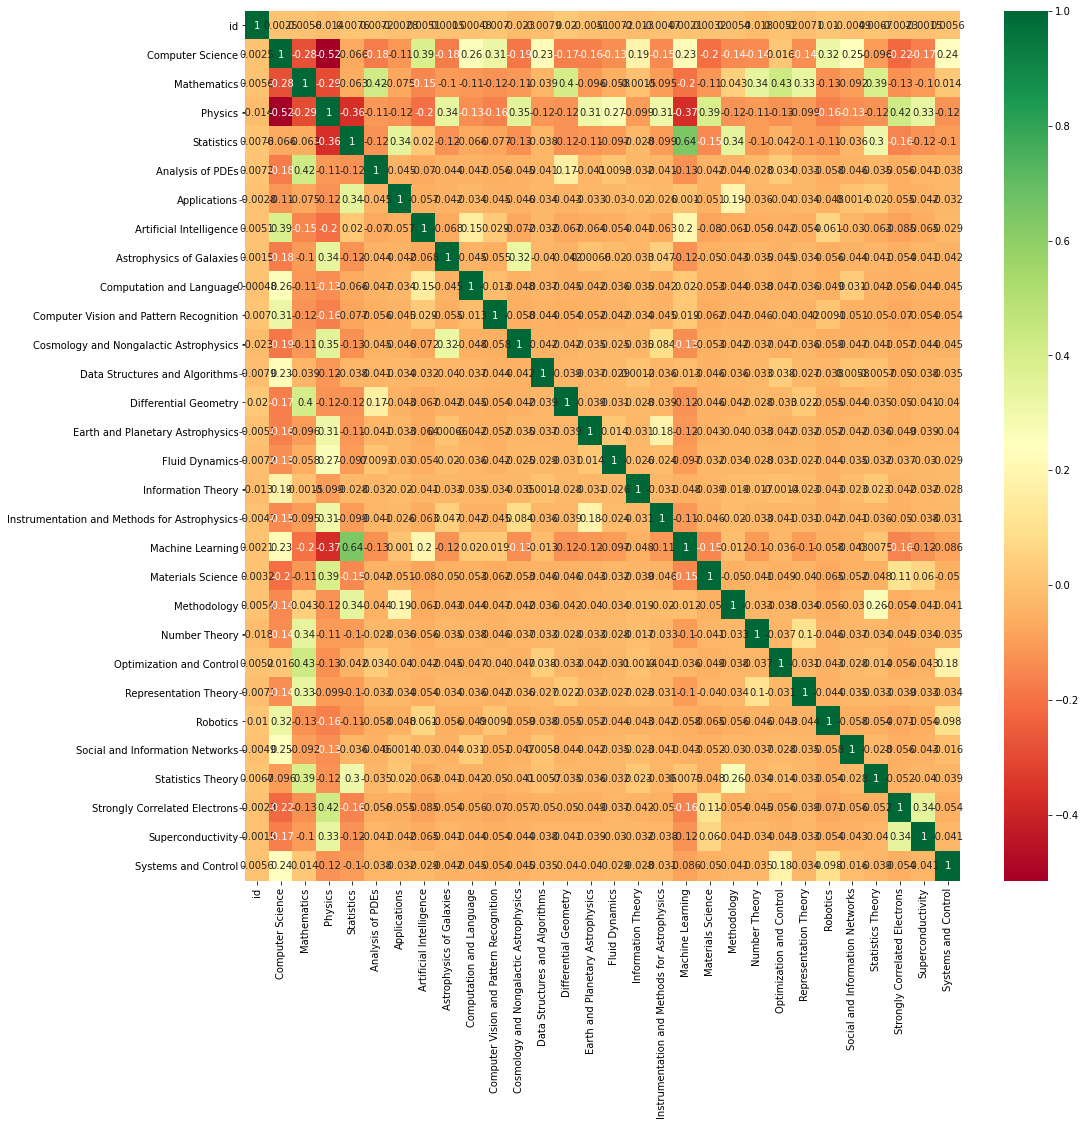

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = dtrain.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
#plot heat map
g=sns.heatmap(dtrain[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Some inferences

*Subtopic Machine learning articles related to topics like Statistics(highly related),Physics,Computer Science and Mathematics*

In [ ]:
# top correlations
s = corrmat.unstack()
abs(s).sort_values(kind="quicksort",ascending=False)[30:].head(30)

Machine Learning                        Statistics                                0.642844
Statistics                              Machine Learning                          0.642844
Computer Science                        Physics                                   0.515015
Physics                                 Computer Science                          0.515015
Mathematics                             Optimization and Control                  0.427941
Optimization and Control                Mathematics                               0.427941
Physics                                 Strongly Correlated Electrons             0.423379
Strongly Correlated Electrons           Physics                                   0.423379
Analysis of PDEs                        Mathematics                               0.422869
Mathematics                             Analysis of PDEs                          0.422869
                                        Differential Geometry                     0.403568

## Data Preprocessing

In [ ]:
import nltk
nltk.download('wordnet')
dtrain['ABSTRACT']=dtrain['ABSTRACT'].apply(lambda x:x.lower())
dtest['ABSTRACT']=dtest['ABSTRACT'].apply(lambda x:x.lower())
import re
for i in range(len(dtrain['ABSTRACT'])):
  dtrain['ABSTRACT'][i]=re.sub(r"\d.",'',dtrain['ABSTRACT'][i])#removing numbers
  dtrain['ABSTRACT'][i]=re.sub(r"(\$+)(?:(?!\1)[\s\S])*\1",'math_equation ',dtrain['ABSTRACT'][i]) # removing math formulas
  #dtrain['ABSTRACT'][i]=re.sub(r'^[a-z]','',dtrain['ABSTRACT'][i])#removing other than a-z
  
for i in range(len(dtest['ABSTRACT'])):
  dtest['ABSTRACT'][i]=re.sub(r"\d.",'',dtest['ABSTRACT'][i])
  dtest['ABSTRACT'][i]=re.sub(r"(\$+)(?:(?!\1)[\s\S])*\1",'math_equation',dtest['ABSTRACT'][i])
  #dtest['ABSTRACT'][i]=re.sub('^[a-z]','',dtest['ABSTRACT'][i])
  
#removing punctuation reduces score

import string
for i in range(len(dtrain['ABSTRACT'])):
  sent=""
  for x in dtrain.ABSTRACT[i]:
    if x not in string.punctuation:
      sent+=x;
    else:
      sent+=" "
  dtrain.ABSTRACT[i]=sent

for i in range(len(dtest['ABSTRACT'])):
  sent=""
  for x in dtest.ABSTRACT[i]:
    if x not in string.punctuation:
      sent+=x;
    else:
      sent+=" "
  dtest.ABSTRACT[i]=sent

from nltk.corpus import stopwords
nltk.download('stopwords')
eng=stopwords.words("english")
#removing stopwords and lemmatizing
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
for i in range(len(dtrain['ABSTRACT'])):
  sent=""
  for s in dtrain['ABSTRACT'][i].split():
    if s in eng:
      continue
    sent+=lemmatizer.lemmatize(s)
    sent+=" "
  dtrain['ABSTRACT'][i]=sent

for i in range(len(dtest['ABSTRACT'])):
  sent=""
  for s in dtest['ABSTRACT'][i].split():
    if s in eng:
      continue
    sent+=lemmatizer.lemmatize(s)
    sent+=" "
  dtest['ABSTRACT'][i]=sent
  

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWi

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
dtr['ABSTRACT'][10]

'we study a problem of extracting the selective connector considering the given set of query vertices $q \\subseteq v$ inside the graph $g = (v,e)$. the selective connector was the subgraph of $g$ which exhibits some cohesiveness property, and contains a query vertices but does not necessarily connect them all. relaxing a connectedness requirement allows a connector to detect multiple communities and to be tolerant to outliers. we achieve this by introducing a new measure of network inefficiency and by instantiating our search considering the selective connector as a problem of finding a minimum inefficiency subgraph. we show that a minimum inefficiency subgraph problem was np-hard, and devise efficient algorithms to approximate it. by means of several case studies inside the variety of application domains (such as human brain, cancer, and food networks), we show that our minimum inefficiency subgraph produces high-quality solutions, exhibiting all a desired behaviors of the selective 

In [ ]:
dtrain['ABSTRACT'][10]

'study problem extracting selective connector considering given set query vertex math equation inside graph math equation selective connector subgraph math equation exhibit cohesiveness property contains query vertex necessarily connect relaxing connectedness requirement allows connector detect multiple community tolerant outlier achieve introducing new measure network inefficiency instantiating search considering selective connector problem finding minimum inefficiency subgraph show minimum inefficiency subgraph problem np hard devise efficient algorithm approximate mean several case study inside variety application domain human brain cancer food network show minimum inefficiency subgraph produce high quality solution exhibiting desired behavior selective connector '

# WordCloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = set(list(STOPWORDS) + ['inside']), random_state = 42)

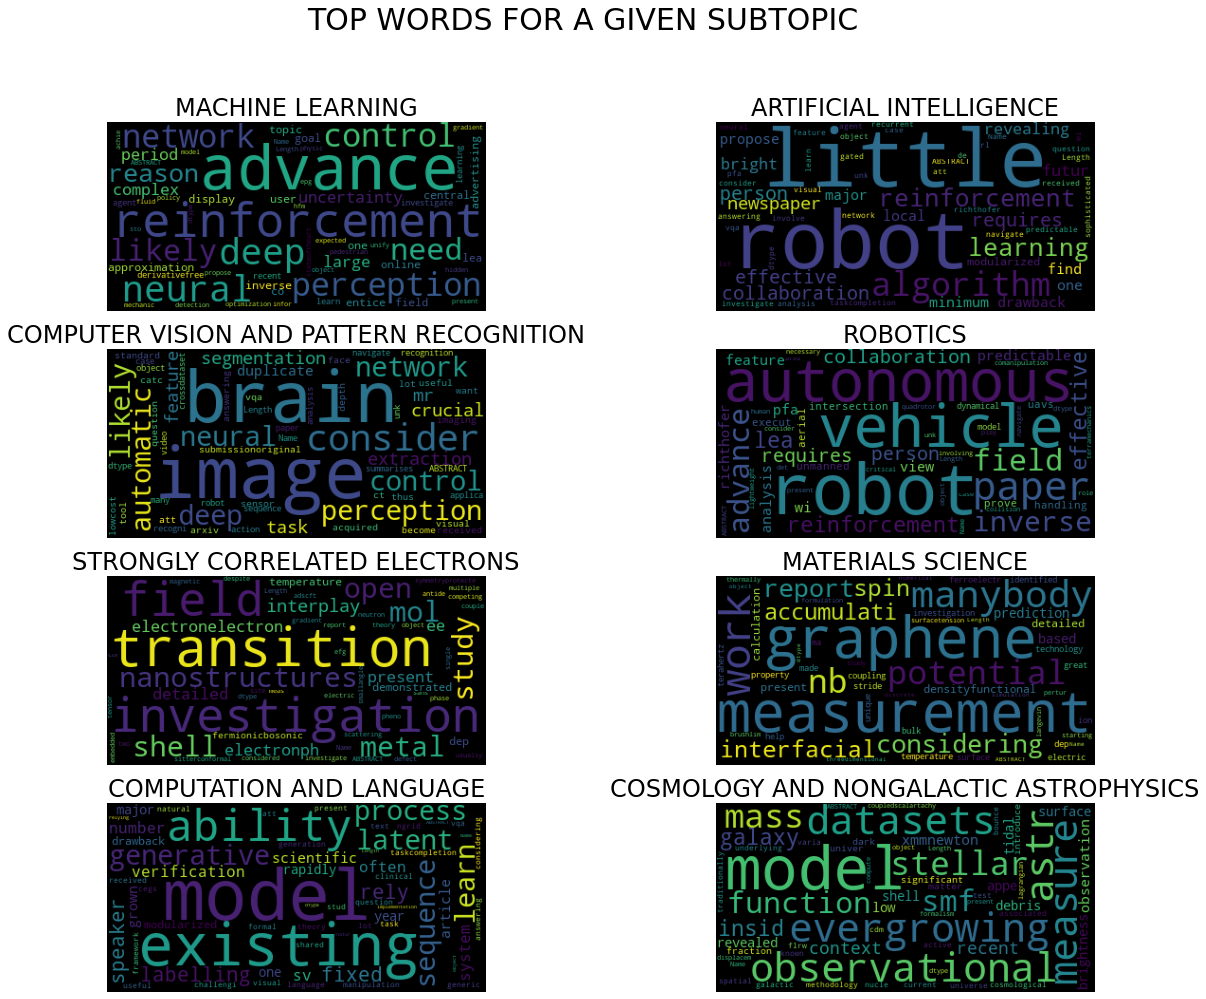

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(20, 16))
axes = [ax for axes_row in axes for ax in axes_row]
for i, sub_topic_name in enumerate(['Machine Learning', 'Artificial Intelligence',  'Computer Vision and Pattern Recognition', 'Robotics','Strongly Correlated Electrons','Materials Science','Computation and Language','Cosmology and Nongalactic Astrophysics']):
  sub_topic = dtrain[dtrain[sub_topic_name] == 1]
  op = wc.generate(str(sub_topic['ABSTRACT']))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(sub_topic_name.upper(), fontsize=24)
  _ = axes[i].axis('off')
_ = plt.suptitle('TOP WORDS FOR A GIVEN SUBTOPIC', fontsize=30)

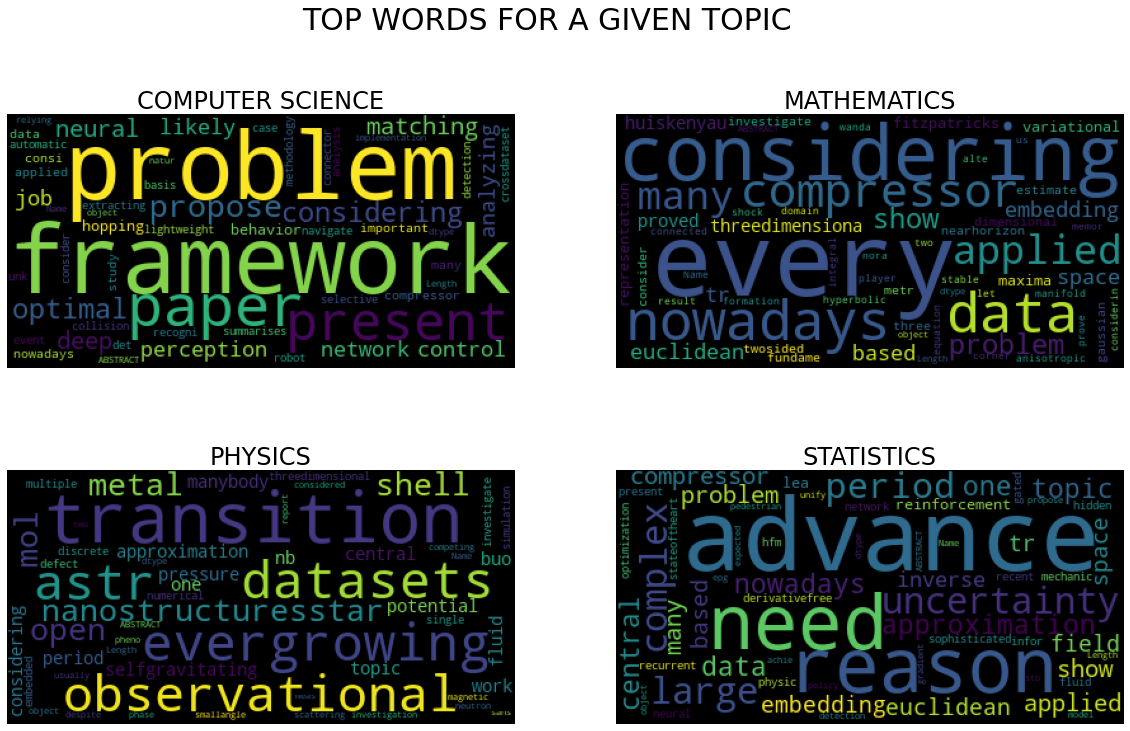

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]
for i, sub_topic_name in enumerate(['Computer Science','Mathematics','Physics','Statistics']):
  sub_topic = dtrain[dtrain[sub_topic_name] == 1]
  op = wc.generate(str(sub_topic['ABSTRACT']))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(sub_topic_name.upper(), fontsize=24)
  _ = axes[i].axis('off')
_ = plt.suptitle('TOP WORDS FOR A GIVEN TOPIC', fontsize=30)

# Bag of Words

In [ ]:
sentence=list(dtrain['ABSTRACT'])+list(dtest['ABSTRACT'])
corpus=[w for line in sentence for w in line.split()]
print(len(corpus))
#=Counter(corpus)
corpus=list(set(corpus))
print(len(corpus))

2041629
41682


In [ ]:
from nltk.util import ngrams


# and get a list of all the bi-grams
esBigrams = ngrams(sentences, 2)

NameError: ignored

The corpus contains 3143895 words in total, but there are many that don't made sense like 'n)$-bit, etc. And check for brackets.

In [ ]:
sorted(c)       

NameError: ignored

For bag of words, the words are replaced by their frequency

In [ ]:
dtrain['Phy_CS']=dtrain['Physics'].astype('str')+dtrain['Computer Science'].astype('str')
dtrain['Phy_Stat']=dtrain['Physics'].astype('str')+dtrain['Statistics'].astype('str')
dtrain['Phy_Math']=dtrain['Physics'].astype('str')+dtrain['Mathematics'].astype('str')
dtrain['CS_Math']=dtrain['Computer Science'].astype('str')+dtrain['Mathematics'].astype('str')
dtest['Phy_CS']=dtest['Physics'].astype('str')+dtest['Computer Science'].astype('str')
dtest['Phy_Stat']=dtest['Physics'].astype('str')+dtest['Statistics'].astype('str')
dtest['Phy_Math']=dtest['Physics'].astype('str')+dtest['Mathematics'].astype('str')
dtest['CS_Math']=dtest['Computer Science'].astype('str')+dtest['Mathematics'].astype('str')

dtrain['CS_counts']=dtrain['Computer Science'].map(dict(dtrain['Computer Science'].value_counts()))
dtrain['Mathematics_counts']=dtrain['Mathematics'].map(dict(dtrain['Mathematics'].value_counts()))
dtrain['Physics_counts']=dtrain['Physics'].map(dict(dtrain['Physics'].value_counts()))
dtrain['Statistics_counts']=dtrain['Statistics'].map(dict(dtrain['Statistics'].value_counts()))

dtest['CS_counts']=dtest['Computer Science'].map(dict(dtest['Computer Science'].value_counts()))
dtest['Mathematics_counts']=dtest['Mathematics'].map(dict(dtest['Mathematics'].value_counts()))
dtest['Physics_counts']=dtest['Physics'].map(dict(dtest['Physics'].value_counts()))
dtest['Statistics_counts']=dtest['Statistics'].map(dict(dtest['Statistics'].value_counts()))


# data splitting

In [ ]:
train,val=train_test_split(dtrain,test_size=0.2,random_state=23)

In [ ]:
dtrain.columns

Index(['id', 'ABSTRACT', 'Computer Science', 'Mathematics', 'Physics',
       'Statistics', 'Analysis of PDEs', 'Applications',
       'Artificial Intelligence', 'Astrophysics of Galaxies',
       'Computation and Language', 'Computer Vision and Pattern Recognition',
       'Cosmology and Nongalactic Astrophysics',
       'Data Structures and Algorithms', 'Differential Geometry',
       'Earth and Planetary Astrophysics', 'Fluid Dynamics',
       'Information Theory', 'Instrumentation and Methods for Astrophysics',
       'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
       'Optimization and Control', 'Representation Theory', 'Robotics',
       'Social and Information Networks', 'Statistics Theory',
       'Strongly Correlated Electrons', 'Superconductivity',
       'Systems and Control'],
      dtype='object')

#Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
?CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(max_features=15000,ngram_range=(1,3))
X=vect.fit_transform(list(dtrain.ABSTRACT)+list(dtest.ABSTRACT))

In [ ]:
TOPIC_COLS=['Computer Science', 'Mathematics', 'Physics', 'Statistics']
train_vec=vect.transform(train['ABSTRACT'])
val_vec=vect.transform(val['ABSTRACT'])
test_vec=vect.transform(dtest['ABSTRACT'])

trn2 = np.hstack((train_vec.toarray(), train[TOPIC_COLS]))
val2 = np.hstack((val_vec.toarray(), val[TOPIC_COLS]))
tst2 = np.hstack((test_vec.toarray(), dtest[TOPIC_COLS]))


In [ ]:
from scipy.sparse import csr_matrix

trn2 = csr_matrix(trn2.astype('int16'))
val2 = csr_matrix(val2.astype('int16'))
tst2 = csr_matrix(tst2.astype('int16'))

In [ ]:
TARGET_COLS = ['Analysis of PDEs', 'Applications',
               'Artificial Intelligence', 'Astrophysics of Galaxies',
               'Computation and Language', 'Computer Vision and Pattern Recognition',
               'Cosmology and Nongalactic Astrophysics',
               'Data Structures and Algorithms', 'Differential Geometry',
               'Earth and Planetary Astrophysics', 'Fluid Dynamics',
               'Information Theory', 'Instrumentation and Methods for Astrophysics',
               'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
               'Optimization and Control', 'Representation Theory', 'Robotics',
               'Social and Information Networks', 'Statistics Theory',
               'Strongly Correlated Electrons', 'Superconductivity',
               'Systems and Control']
#train[TARGET_COLS]

In [ ]:
def get_best_thresholds(true, preds):
  thresholds = [i/100 for i in range(100)]
  best_thresholds = []
  for idx in range(25):
    f1_scores = [f1_score(true[:, idx], (preds[:, idx] > thresh) * 1) for thresh in thresholds]
    best_thresh = thresholds[np.argmax(f1_scores)]
    best_thresholds.append(best_thresh)
  return best_thresholds

##Binary reveleance

In [ ]:
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 1.9MB/s 


In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
classifier = BinaryRelevance(GaussianNB())

In [ ]:
classifier.fit(trn2, train[TARGET_COLS])

BinaryRelevance(classifier=GaussianNB(priors=None, var_smoothing=1e-09),
                require_dense=[True, True])

In [ ]:
f1_score(val[TARGET_COLS], classifier.predict(val2), average='micro')

0.3674720519293185

F1-score using Binary Revelance came to be 0.3674

In [ ]:
val_preds = classifier.predict_proba(val2)

best_thresholds = get_best_thresholds(val[TARGET_COLS].values, val_preds)

for i, thresh in enumerate(best_thresholds):
  val_preds[:, i] = (val_preds[:, i] > thresh) * 1
  
f1_score(val[TARGET_COLS], val_preds, average='micro')

TypeError: ignored

#Classifier Chains

In [ ]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
classify = ClassifierChain(LogisticRegression())

In [ ]:
classify.fit(trn2, train[TARGET_COLS])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


KeyboardInterrupt: ignored

Classifier chain is not be able to converge, check later.

#Label Powerset

In [ ]:
from skmultilearn.problem_transform import LabelPowerset
clfy = LabelPowerset(LogisticRegression())

In [ ]:
clfy.fit(trn2, train[TARGET_COLS])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LabelPowerset(classifier=LogisticRegression(C=1.0, class_weight=None,
                                            dual=False, fit_intercept=True,
                                            intercept_scaling=1, l1_ratio=None,
                                            max_iter=100, multi_class='auto',
                                            n_jobs=None, penalty='l2',
                                            random_state=None, solver='lbfgs',
                                            tol=0.0001, verbose=0,
                                            warm_start=False),
              require_dense=[True, True])

In [ ]:
validation=clfy.predict(val2)
f1_score(val[TARGET_COLS], validation, average='micro')
print(type(val[TARGET_COLS]))
print(type(validation))

<class 'pandas.core.frame.DataFrame'>
<class 'scipy.sparse.lil.lil_matrix'>


f1 score using label Powerset is coming to be 0.7086, but the next code snippet is showing an error.

In [ ]:
val_preds = clfy.predict_proba(val2)
best_thresholds = get_best_thresholds(val[TARGET_COLS].values, val_preds)

for i, thresh in enumerate(best_thresholds):
  val_preds[:, i] = (val_preds[:, i] > thresh) * 1

f1_score(val[TARGET_COLS], val_preds, average='micro')

TypeError: ignored

In [ ]:
preds_test=clfy.predict(tst2)
#for i, thresh in enumerate(best_thresholds):
#  preds_test[:, i] = (preds_test[:, i] > thresh) * 1
print(preds_test)
#download_preds(pd.Dataframe(preds_test), 'labelpowerset.csv')

  (0, 13)	1
  (1, 1)	1
  (2, 10)	1
  (3, 0)	1
  (4, 3)	1
  (5, 20)	1
  (6, 13)	1
  (7, 24)	1
  (8, 21)	1
  (9, 14)	1
  (10, 13)	1
  (11, 10)	1
  (12, 13)	1
  (12, 15)	1
  (13, 14)	1
  (14, 16)	1
  (15, 5)	1
  (16, 5)	1
  (17, 19)	1
  (18, 14)	1
  (19, 22)	1
  (20, 24)	1
  (21, 13)	1
  (22, 21)	1
  (23, 24)	1
  (24, 9)	1
  (25, 0)	1
  (26, 11)	1
  (27, 13)	1
  (28, 13)	1
  (29, 13)	1
  (30, 1)	1
  (31, 6)	1
  (32, 0)	1
  (33, 0)	1
  (34, 11)	1
  (35, 22)	1
  (36, 19)	1
  (37, 8)	1
  (38, 22)	1
  (39, 13)	1
  (40, 22)	1
  (41, 20)	1
  (42, 8)	1
  (43, 2)	1
  (44, 8)	1
  (45, 14)	1
  (46, 9)	1
  (47, 13)	1
  (48, 13)	1
  (49, 2)	1
  (49, 13)	1
  (50, 4)	1
  (51, 4)	1
  (52, 2)	1
  (52, 13)	1
  (53, 3)	1
  (54, 4)	1
  (55, 13)	1
  (56, 8)	1
  (57, 13)	1
  (58, 3)	1
  (59, 22)	1
  (59, 23)	1
  (60, 0)	1
  (61, 18)	1
  (62, 11)	1
  (63, 20)	1
  (64, 2)	1
  (64, 13)	1
  (65, 2)	1
  (65, 4)	1
  (65, 13)	1
  (66, 13)	1
  (67, 8)	1
  (68, 15)	1
  (69, 2)	1
  (69, 13)	1
  (70, 16)	1
  (71, 6)	1
 

#OneVRest

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
#from skmultilearn.problem_transform import ClassifierChain

In [ ]:
clf = OneVsRestClassifier(LogisticRegression(C = 10, n_jobs=-1))
clf.fit(trn2, train[TARGET_COLS])

NameError: ignored

In [ ]:
clf = ClassifierChain(XGBClassifier())
clf.fit(trn2, train[TARGET_COLS])

In [ ]:
f1_score(val[TARGET_COLS], clf.predict(val2), average='micro')

In [ ]:
val_preds = clf.predict_proba(val2)

best_thresholds = get_best_thresholds(val[TARGET_COLS].values, val_preds)

for i, thresh in enumerate(best_thresholds):
  val_preds[:, i] = (val_preds[:, i] > thresh) * 1
  
f1_score(val[TARGET_COLS], val_preds, average='micro')

0.7229816868712923

In [ ]:
preds_test = clf.predict_proba(tst2)

for i, thresh in enumerate(best_thresholds):
  preds_test[:, i] = (preds_test[:, i] > thresh) * 1

download_preds(preds_test, 'hacklive_NLP_count_added_topics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pred_test=clf.predict(tst2)

In [ ]:
clf = OneVsRestClassifier(XGBClassifier())
clf.fit(trn2, train[TARGET_COLS])

OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=3, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=1, nthread=None,
                                            objective='binary:logistic',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None, subsample=1,
                                            verbosity=1),
                    n_jobs=None)

In [ ]:
val_preds = clf.predict_proba(val2)
bow_xgb=val_preds
best_thresholds = get_best_thresholds(val[TARGET_COLS].values, val_preds)

for i, thresh in enumerate(best_thresholds):
  val_preds[:, i] = (val_preds[:, i] > thresh) * 1
  
f1_score(val[TARGET_COLS], val_preds, average='micro')

0.7351569393672003

In [ ]:
preds_test = clf.predict_proba(tst2)
f1=preds_test


In [ ]:
preds_test = clf.predict_proba(tst2)
f1_pred=preds_test
for i, thresh in enumerate(best_thresholds):
  preds_test[:, i] = (preds_test[:, i] > thresh) * 1

download_preds(preds_test, 'hacklive_NLP_count_added_topics.csv')

In [ ]:
from lightgbm import LGBMClassifier
clf_lgb = OneVsRestClassifier(LGBMClassifier())
clf_lgb.fit(trn2, train[TARGET_COLS])
val_lgb = clf_lgb.predict_proba(val2)
#bow_xgb=val_preds
best_thresholds = get_best_thresholds(val[TARGET_COLS].values, val_lgb)

for i, thresh in enumerate(best_thresholds):
  val_lgb[:, i] = (val_lgb[:, i] > thresh) * 1
  
f1_score(val[TARGET_COLS], val_lgb, average='micro')

In [ ]:
!pip install catboost

     |████████████████████████████████| 66.2MB 44kB/s 


In [ ]:
from catboost import CatBoostClassifier
?CatBoostClassifier

In [ ]:
clf = OneVsRestClassifier(CatBoostClassifier())
clf.fit(trn2, train[TARGET_COLS])

Streaming output truncated to the last 5000 lines.
5:	learn: 0.4706091	total: 706ms	remaining: 1m 56s
6:	learn: 0.4422562	total: 833ms	remaining: 1m 58s
7:	learn: 0.4166837	total: 949ms	remaining: 1m 57s
8:	learn: 0.3956571	total: 1.08s	remaining: 1m 58s
9:	learn: 0.3735682	total: 1.2s	remaining: 1m 58s
10:	learn: 0.3332986	total: 1.34s	remaining: 2m
11:	learn: 0.3172834	total: 1.46s	remaining: 2m
12:	learn: 0.2859291	total: 1.6s	remaining: 2m 1s
13:	learn: 0.2723355	total: 1.72s	remaining: 2m 1s
14:	learn: 0.2615820	total: 1.85s	remaining: 2m 1s
15:	learn: 0.2496907	total: 1.96s	remaining: 2m
16:	learn: 0.2386713	total: 2.1s	remaining: 2m 1s
17:	learn: 0.2287513	total: 2.21s	remaining: 2m
18:	learn: 0.2098186	total: 2.37s	remaining: 2m 2s
19:	learn: 0.1942879	total: 2.5s	remaining: 2m 2s
20:	learn: 0.1873210	total: 2.62s	remaining: 2m 2s
21:	learn: 0.1812906	total: 2.74s	remaining: 2m 1s
22:	learn: 0.1751667	total: 2.87s	remaining: 2m 1s
23:	learn: 0.1634834	total: 2.97s	remaining: 2m

OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x7f90cdced518>,
                    n_jobs=None)

In [ ]:
val_preds = clf.predict_proba(val2)

best_thresholds = get_best_thresholds(val[TARGET_COLS].values, val_preds)

for i, thresh in enumerate(best_thresholds):
  val_preds[:, i] = (val_preds[:, i] > thresh) * 1
    
f1_score(val[TARGET_COLS], val_preds, average='micro')

0.7514436032336712

In [ ]:
from sklearn.metrics import classification_report
classification_report(val[TARGET_COLS], val_preds)

In [ ]:
f1=clf.predict_proba(tst2)
download_preds(f1, 'bow_cat_prob.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
preds_test = clf.predict_proba(tst2)

for i, thresh in enumerate(best_thresholds):
  preds_test[:, i] = (preds_test[:, i] > thresh) * 1

download_preds(preds_test, 'hacklive_NLP_count_added_topics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
f1_prob=pd.DataFrame('')

# TF IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features=10000)
x=vec.fit_transform(list(dtrain['ABSTRACT']) + list(dtest['ABSTRACT']))

In [ ]:
TOPIC_COLS=['Computer Science', 'Mathematics', 'Physics', 'Statistics']
trn2 = vec.transform(train['ABSTRACT']).todense()
val2 = vec.transform(val['ABSTRACT']).todense()
tst2 = vec.transform(dtest['ABSTRACT']).todense()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf_vectorize(series, max_features):
    vectorizer = TfidfVectorizer(max_features=max_features,ngram_range=(1,3))
    return np.array(vectorizer.fit_transform(series).todense(), dtype=np.float16)

def feature_engineering(df):
    txt_vectors = tfidf_vectorize(df['ABSTRACT'], 10000)

    for i in range(10000):
        df.loc[:, 'txt_tfidf_' + str(i)] = txt_vectors[:, i]
    df.drop("ABSTRACT", axis = 1, inplace = True)
    return df

In [ ]:
tf_df=dtrain.copy()
train_data = feature_engineering(tf_df)

KeyboardInterrupt: ignored

In [ ]:
trn2.shape

(11203, 10000)

In [ ]:
for i in range(10000):
        df.loc[:, 'txt_tfidf_' + str(i)] = txt_vectors[:, i]
    df.drop("txt", axis = 1, inplace = True)

In [ ]:

print(trn2)
clf = OneVsRestClassifier(LogisticRegression(C=10,n_jobs=-1))
_ = clf.fit(trn2, train[TARGET_COLS])

val_preds = clf.predict_proba(val2)
tfidf_log=val_preds

best_thresholds = get_best_thresholds(val[TARGET_COLS].values, val_preds)

for i, thresh in enumerate(best_thresholds):
  val_preds[:, i] = (val_preds[:, i] > thresh) * 1
  
f1_score(val[TARGET_COLS], val_preds, average='micro')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
x

<20006x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 1657761 stored elements in Compressed Sparse Row format>

The f1 score is 0.6902 only on text data with ngram range 1-4 

In [ ]:
?LGBMClassifier

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
TOPIC_COLS=['Computer Science', 'Mathematics', 'Physics', 'Statistics']
trn2 = vec.transform(train['ABSTRACT'])
val2 = vec.transform(val['ABSTRACT'])
tst2 = vec.transform(dtest['ABSTRACT'])
print(trn2)
clf = OneVsRestClassifier(LGBMClassifier())
_ = clf.fit(trn2, train[TARGET_COLS])  
f1_score(val[TARGET_COLS], clf.predict(val2), average='micro')

  (0, 9972)	0.1405413683821504
  (0, 9971)	0.1194622663871214
  (0, 9956)	0.07425769630602055
  (0, 9950)	0.1289884106320762
  (0, 9933)	0.11130459960180424
  (0, 9867)	0.12598121500639847
  (0, 9866)	0.05443124861282987
  (0, 9710)	0.2888724859970167
  (0, 9523)	0.08984054075052485
  (0, 9334)	0.08933131390895485
  (0, 9105)	0.12717866251396637
  (0, 8896)	0.10913338332981679
  (0, 8720)	0.06701806428501095
  (0, 8717)	0.050814128159051467
  (0, 8581)	0.12641507714223396
  (0, 8430)	0.06813109484221724
  (0, 8392)	0.12263412576135534
  (0, 8133)	0.1331449449686353
  (0, 7849)	0.07791927872887813
  (0, 7179)	0.14563089760549486
  (0, 7176)	0.07414867865003827
  (0, 7027)	0.12453366062293804
  (0, 6833)	0.0795040169218705
  (0, 6634)	0.12375177890914747
  (0, 6630)	0.10064804381109377
  :	:
  (11202, 3526)	0.10431813633450117
  (11202, 3181)	0.0548027878723171
  (11202, 3059)	0.08732775887103947
  (11202, 2980)	0.05839474928801815
  (11202, 2693)	0.07670117688678867
  (11202, 2688)	0.05

0.6272567502795974

In [ ]:
f2_pred = clf.predict_proba(tst2)


What can we do?<br>
Hyper Parameter Tuning <br>
Combining the topics <br>
Using RNN <br>
USing Transfer Learning (like BERT)

#Word2Vec

In [ ]:
import gensim
from gensim.models import Word2Vec

We will be using a pre-trained word2vec model by google

In [ ]:
wv = gensim.models.KeyedVectors.load_word2vec_format("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
from itertools import islice
list(islice(wv.vocab, 13030, 13050))

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

We will be doing simple BOW approach

In [ ]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

In [ ]:
def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

Now, tokenizing the data

In [ ]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
train_token=train.apply(lambda r: w2v_tokenize_text(r['ABSTRACT']), axis=1).values
val_token=val.apply(lambda r: w2v_tokenize_text(r['ABSTRACT']), axis=1).values

In [ ]:
X_train_word_average = word_averaging_list(wv,train_token)
X_val_word_average = word_averaging_list(wv,val_token)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
print(type(X_train_word_average))

<class 'numpy.ndarray'>


Combing with the Topics

In [ ]:
TOPIC_COLS=['Computer Science', 'Mathematics', 'Physics', 'Statistics']
trn2 = np.hstack((X_train_word_average, train[TOPIC_COLS]))
val2 = np.hstack((X_val_word_average, val[TOPIC_COLS]))
#tst2 = np.hstack((test_vec.toarray(), dtest[TOPIC_COLS]))

In [ ]:
from scipy.sparse import csr_matrix

trn2 = csr_matrix(trn2.astype('int16'))
val2 = csr_matrix(val2.astype('int16'))

Now, with OneVRest Classification

In [ ]:
clf = OneVsRestClassifier(LogisticRegression(C = 10, n_jobs=-1))
clf.fit(trn2, train[TARGET_COLS])

OneVsRestClassifier(estimator=LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto', n_jobs=-1,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:
val_preds = clf.predict_proba(val2)

best_thresholds = get_best_thresholds(val[TARGET_COLS].values, val_preds)

for i, thresh in enumerate(best_thresholds):
  val_preds[:, i] = (val_preds[:, i] > thresh) * 1
  
f1_score(val[TARGET_COLS], val_preds, average='micro')

0.33949652309848527

This model does poorly 

# word2vec 2

In [ ]:
from gensim.models.phrases import Phrases, Phraser

In [ ]:
sent = [row.split() for row in train['ABSTRACT']]

In [ ]:
phrases = Phrases(sent, min_count=10, progress_per=10000)

In [ ]:
bigram = Phraser(phrases)
sentences = bigram[sent]
word_freq = {}
for sent in sentences:
    for i in sent:
        if i not in word_freq:
          word_freq[i] = 1  
        else:
          word_freq[i] += 1
len(word_freq)

48411

In [ ]:
import multiprocessing

from gensim.models import Word2Vec

In [ ]:
cores = multiprocessing.cpu_count()
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [ ]:


w2v_model.build_vocab(sentences, progress_per=10000)


In [ ]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(14495209, 29845080)

Let's try with Doc2Vec and see if we can get any better score

# Doc2Vec

Instead of finding relationship with words, let's start finding relationship with the sentences

In [ ]:
#copying the contents
X_train=train.copy()
X_val=val.copy()

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled
X_train_1 = label_sentences(X_train['ABSTRACT'], 'Train')
X_val_1 = label_sentences(X_val['ABSTRACT'], 'Val')
X_test_1=label_sentences(dtest['ABSTRACT'],'Test')
all_data = X_train_1 + X_val_1+X_test_1

In [ ]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 20006/20006 [00:00<00:00, 2534087.69it/s]


In [ ]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train_1), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_val_1), 300, 'Val')
Test_dbow=get_vectors(model_dbow,len(X_test_1),300,'Test')

In [ ]:
TOPIC_COLS=['Computer Science', 'Mathematics', 'Physics', 'Statistics']
trn3 = np.hstack((train_vectors_dbow, train[TOPIC_COLS]))
val3 = np.hstack((test_vectors_dbow, val[TOPIC_COLS]))
tst3 = np.hstack((Test_dbow, dtest[TOPIC_COLS]))

NameError: ignored

In [ ]:
trn3 = csr_matrix(trn3.astype('int16'))
val3 = csr_matrix(val3.astype('int16'))
tst3 = csr_matrix(tst3.astype('int16'))

NameError: ignored

Let's apply OneVrest Classification Again.

In [ ]:
clf1 = OneVsRestClassifier(LogisticRegression(C = 10, n_jobs=-1))
clf1.fit(trn3, X_train[TARGET_COLS])

OneVsRestClassifier(estimator=LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto', n_jobs=-1,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:
clf1.predict_proba(val3)

array([[9.13065896e-10, 1.41722678e-05, 2.96915728e-01, ...,
        4.61254680e-05, 1.26517621e-06, 2.79161845e-02],
       [5.09306559e-09, 8.88087129e-07, 1.01432620e-01, ...,
        6.22112812e-07, 1.66439886e-08, 1.61919259e-01],
       [4.22370618e-12, 3.35572294e-01, 3.63911333e-01, ...,
        3.60870657e-07, 2.43241758e-07, 4.95992633e-04],
       ...,
       [5.51252898e-08, 1.21203797e-04, 3.76018836e-02, ...,
        8.11521020e-06, 1.17191924e-06, 8.36588474e-01],
       [7.38912232e-03, 9.55221805e-06, 7.69034204e-05, ...,
        5.89387667e-06, 6.50291105e-06, 1.61811776e-06],
       [3.42326822e-06, 5.30550622e-05, 2.30558202e-06, ...,
        3.44416352e-01, 4.41124113e-02, 2.85290996e-05]])

In [ ]:
val_preds_1 = clf1.predict_proba(val3)
best_thresholds = get_best_thresholds(X_val[TARGET_COLS].values, val_preds_1)

for i, thresh in enumerate(best_thresholds):
  val_preds[:, i] = (val_preds_1[:, i] > thresh) * 1
  
f1_score(X_val[TARGET_COLS], val_preds, average='micro')

NameError: ignored

In [ ]:
pred_result=clf1.predict(tst3)

In [ ]:
clf2 = OneVsRestClassifier(XGBClassifier())
clf2.fit(train_vectors_dbow, X_train[TARGET_COLS])

In [ ]:
val_preds3 = clf2.predict(test_vectors_dbow)
f1_score(X_val[TARGET_COLS], val_preds3, average='micro')

# Word embedding

In [ ]:
dtr=dtrain.copy()
dts=dtest.copy()
dtr['text'] = ' '
dts['text'] = ' '


dtr['text'] += dtrain['ABSTRACT']
dts['text'] += dtest['ABSTRACT']

trn, val = train_test_split(dtr, test_size=0.2, random_state=2)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tok = Tokenizer(num_words = 1000000)
tok.fit_on_texts(dtr['text'].str.lower().tolist() + dts['text'].str.lower().tolist())

vocab_size = len(tok.word_index) + 1

In [ ]:
tok.word_index

{'inside': 1,
 'considering': 2,
 'equation': 3,
 'math': 4,
 'model': 5,
 'method': 6,
 'data': 7,
 'network': 8,
 'problem': 9,
 'result': 10,
 'based': 11,
 'algorithm': 12,
 'show': 13,
 'system': 14,
 'learning': 15,
 'help': 16,
 'time': 17,
 'paper': 18,
 'two': 19,
 'state': 20,
 'also': 21,
 'study': 22,
 'function': 23,
 'proposed': 24,
 'idea': 25,
 'one': 26,
 'new': 27,
 'behind': 28,
 'present': 29,
 'high': 30,
 'number': 31,
 'performance': 32,
 'different': 33,
 'large': 34,
 'structure': 35,
 'task': 36,
 'propose': 37,
 'image': 38,
 'field': 39,
 'used': 40,
 'set': 41,
 'analysis': 42,
 'parameter': 43,
 'well': 44,
 'feature': 45,
 'space': 46,
 'order': 47,
 'work': 48,
 'information': 49,
 'distribution': 50,
 'first': 51,
 'use': 52,
 'non': 53,
 'neural': 54,
 'case': 55,
 'property': 56,
 'deep': 57,
 'real': 58,
 'application': 59,
 'framework': 60,
 'solution': 61,
 'process': 62,
 'graph': 63,
 'point': 64,
 'however': 65,
 'sample': 66,
 'approximation': 

In [ ]:
X_trn = tok.texts_to_sequences(trn['text'])
X_val = tok.texts_to_sequences(val['text'])
X_test = tok.texts_to_sequences(dts['text'])

In [ ]:
maxlen = 200
X_trn = pad_sequences(X_trn, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, SpatialDropout1D, LSTM, Bidirectional


embedding_dim = 50
vocab_size = len(tok.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=maxlen))
model.add(Bidirectional(LSTM(128,return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
#model.add(Dropout(0.5))
#model.add(Flatten())
model.add(Dense(200, activation='softmax', name = 'Fully_Connected'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid', name = 'Output'))
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 50)           3279350   
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 256)          183296    
_________________________________________________________________
dropout_6 (Dropout)          (None, 200, 256)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
Fully_Connected (Dense)      (None, 200)               25800     
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
Output (Dense)               (None, 25)               

In [ ]:
model.fit(X_trn, trn[TARGET_COLS], validation_data=(X_val, val[TARGET_COLS]), verbose=True, epochs=50, batch_size=32)

Epoch 1/50
351/351 [==============================] - 24s 69ms/step - loss: 2.0561 - accuracy: 0.4659 - val_loss: 2.5639 - val_accuracy: 0.4373
Epoch 2/50
351/351 [==============================] - 24s 69ms/step - loss: 2.0539 - accuracy: 0.4675 - val_loss: 2.5397 - val_accuracy: 0.4413
Epoch 3/50
351/351 [==============================] - 24s 69ms/step - loss: 2.0425 - accuracy: 0.4686 - val_loss: 2.5247 - val_accuracy: 0.4434
Epoch 4/50
351/351 [==============================] - 24s 69ms/step - loss: 2.0324 - accuracy: 0.4666 - val_loss: 2.5477 - val_accuracy: 0.4420
Epoch 5/50
351/351 [==============================] - 24s 69ms/step - loss: 2.0314 - accuracy: 0.4592 - val_loss: 2.5309 - val_accuracy: 0.4423
Epoch 6/50
351/351 [==============================] - 24s 68ms/step - loss: 2.0408 - accuracy: 0.4579 - val_loss: 2.6000 - val_accuracy: 0.4438
Epoch 7/50
351/351 [==============================] - 24s 69ms/step - loss: 2.0360 - accuracy: 0.4655 - val_loss: 2.5410 - val_accuracy:

Stopped because the accuracy remains constant at 0.17, <br> 
* Run 50 epochs of batch_size=32, training accuracy came out 
 to be," 0.2406", and validation accuracy to be "0.2667". <br>
 then continued with next 50 epochs of batch_size=64, accuracy be "0.2874", and validation accuracy be "0.3295"
 <br>
 then for next 50 epochs with same batch_size,
 accuracy was "0.3621", and validation accuracy "0.3745"
 <br>
 the next 50 epochs of batch_size=32, accuracy was "0.4610", and validation accuracy "0.4366"
 <br>
the nect 50 epochs of batch size same as above, accuracy came to be "0.5560", and validation accuracy "0.4598",
<br>
the loss is still 1.8060, so it's high chance that the model has overfitted.

#using GloVe embedding

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-10-25 17:16:11--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-10-25 17:16:11--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-10-25 17:16:11--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tok.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

#using BERT

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==1.15

Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.3.0
     |████████████████████████████████| 412.3MB 40kB/s 
     |████████████████████████████████| 512kB 44.3MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 3.8MB 47.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=878cc0ede832f6070f906042bb3ff6e866ae75d5d320440b1ffeb521ad329728
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probabilit

In [ ]:
!pip install bert-tensorflow==1.0.1

     |████████████████████████████████| 71kB 3.5MB/s 


In [ ]:
import bert
from bert import modeling
from bert import run_classifier
from bert import optimization
from bert import tokenization


AttributeError: ignored

In [ ]:
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip

In [ ]:
import zipfile
repo = 'model_repo'
with zipfile.ZipFile("uncased_L-12_H-768_A-12.zip","r") as zip_ref:
    zip_ref.extractall(repo)

In [ ]:
#import tokenization
#import modeling
BERT_VOCAB= '/content/model_repo/uncased_L-12_H-768_A-12/vocab.txt'
BERT_INIT_CHKPNT = '/content/model_repo/uncased_L-12_H-768_A-12/bert_model.ckpt'
BERT_CONFIG = '/content/model_repo/uncased_L-12_H-768_A-12/bert_config.json'

In [ ]:
tokenization.validate_case_matches_checkpoint(True,BERT_INIT_CHKPNT)
tokenizer = tokenization.FullTokenizer(
      vocab_file=BERT_VOCAB, do_lower_case=True)

In [ ]:
ID = 'id'
DATA_COLUMN = 'ABSTRACT'
LABEL_COLUMNS = ['Analysis of PDEs', 'Applications',
               'Artificial Intelligence', 'Astrophysics of Galaxies',
               'Computation and Language', 'Computer Vision and Pattern Recognition',
               'Cosmology and Nongalactic Astrophysics',
               'Data Structures and Algorithms', 'Differential Geometry',
               'Earth and Planetary Astrophysics', 'Fluid Dynamics',
               'Information Theory', 'Instrumentation and Methods for Astrophysics',
               'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
               'Optimization and Control', 'Representation Theory', 'Robotics',
               'Social and Information Networks', 'Statistics Theory',
               'Strongly Correlated Electrons', 'Superconductivity',
               'Systems and Control']

In [ ]:
class InputExample(object):
    """A single training/test example for simple sequence classification."""

    def __init__(self, guid, text_a, text_b=None, labels=None):
        """Constructs a InputExample.

        Args:
            guid: Unique id for the example.
            text_a: string. The untokenized text of the first sequence. For single
            sequence tasks, only this sequence must be specified.
            text_b: (Optional) string. The untokenized text of the second sequence.
            Only must be specified for sequence pair tasks.
            labels: (Optional) [string]. The label of the example. This should be
            specified for train and dev examples, but not for test examples.
        """
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.labels = labels


class InputFeatures(object):
    """A single set of features of data."""

    def __init__(self, input_ids, input_mask, segment_ids, label_ids, is_real_example=True):
        self.input_ids = input_ids
        self.input_mask = input_mask
        self.segment_ids = segment_ids
        self.label_ids = label_ids,
        self.is_real_example=is_real_example

In [ ]:
def create_examples(df, labels_available=True):
    """Creates examples for the training and dev sets."""
    examples = []
    for (i, row) in enumerate(df.values):
        guid = row[0]
        text_a = row[1]
        if labels_available:
            labels = row[6:]
        else:
            labels = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        examples.append(
            InputExample(guid=guid, text_a=text_a, labels=labels))
        print(labels)
    return examples

In [ ]:
TRAIN_VAL_RATIO = 0.8
LEN = dtrain.shape[0]
SIZE_TRAIN = int(TRAIN_VAL_RATIO*LEN)

x_train = dtrain[:SIZE_TRAIN]
x_val = dtrain[SIZE_TRAIN:]

# Use the InputExample class from BERT's run_classifier code to create examples from the data
train_examples = create_examples(x_train)


In [ ]:
dtrain.shape, x_train.shape, x_val.shape

((14004, 31), (11203, 31), (2801, 31))

In [ ]:
dtrain.head()

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,Computation and Language,Computer Vision and Pattern Recognition,Cosmology and Nongalactic Astrophysics,Data Structures and Algorithms,Differential Geometry,Earth and Planetary Astrophysics,Fluid Dynamics,Information Theory,Instrumentation and Methods for Astrophysics,Machine Learning,Materials Science,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,evergrowing datasets inside observational astr...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,3094,propose framework considering optimal matching...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures open shell transition metal mol...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2082,star selfgravitating fluid inside pressure buo...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception control network likely ...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas

def convert_examples_to_features(examples,  max_seq_length, tokenizer):
    """Loads a data file into a list of `InputBatch`s."""

    features = []
    for (ex_index, example) in enumerate(examples):
        print(example.text_a)
        tokens_a = tokenizer.tokenize(example.text_a)

        tokens_b = None
        if example.text_b:
            tokens_b = tokenizer.tokenize(example.text_b)
            # Modifies `tokens_a` and `tokens_b` in place so that the total
            # length is less than the specified length.
            # Account for [CLS], [SEP], [SEP] with "- 3"
            _truncate_seq_pair(tokens_a, tokens_b, max_seq_length - 3)
        else:
            # Account for [CLS] and [SEP] with "- 2"
            if len(tokens_a) > max_seq_length - 2:
                tokens_a = tokens_a[:(max_seq_length - 2)]

        # The convention in BERT is:
        # (a) For sequence pairs:
        #  tokens:   [CLS] is this jack ##son ##ville ? [SEP] no it is not . [SEP]
        #  type_ids: 0   0  0    0    0     0       0 0    1  1  1  1   1 1
        # (b) For single sequences:
        #  tokens:   [CLS] the dog is hairy . [SEP]
        #  type_ids: 0   0   0   0  0     0 0
        #
        # Where "type_ids" are used to indicate whether this is the first
        # sequence or the second sequence. The embedding vectors for `type=0` and
        # `type=1` were learned during pre-training and are added to the wordpiece
        # embedding vector (and position vector). This is not *strictly* necessary
        # since the [SEP] token unambigiously separates the sequences, but it makes
        # it easier for the model to learn the concept of sequences.
        #
        # For classification tasks, the first vector (corresponding to [CLS]) is
        # used as as the "sentence vector". Note that this only makes sense because
        # the entire model is fine-tuned.
        tokens = ["[CLS]"] + tokens_a + ["[SEP]"]
        segment_ids = [0] * len(tokens)

        if tokens_b:
            tokens += tokens_b + ["[SEP]"]
            segment_ids += [1] * (len(tokens_b) + 1)

        input_ids = tokenizer.convert_tokens_to_ids(tokens)

        # The mask has 1 for real tokens and 0 for padding tokens. Only real
        # tokens are attended to.
        input_mask = [1] * len(input_ids)

        # Zero-pad up to the sequence length.
        padding = [0] * (max_seq_length - len(input_ids))
        input_ids += padding
        input_mask += padding
        segment_ids += padding

        assert len(input_ids) == max_seq_length
        assert len(input_mask) == max_seq_length
        assert len(segment_ids) == max_seq_length
        
        labels_ids = []
        for label in example.labels:
            labels_ids.append(int(label))

        if ex_index < 0:
            logger.info("*** Example ***")
            logger.info("guid: %s" % (example.guid))
            logger.info("tokens: %s" % " ".join(
                    [str(x) for x in tokens]))
            logger.info("input_ids: %s" % " ".join([str(x) for x in input_ids]))
            logger.info("input_mask: %s" % " ".join([str(x) for x in input_mask]))
            logger.info(
                    "segment_ids: %s" % " ".join([str(x) for x in segment_ids]))
            logger.info("label: %s (id = %s)" % (example.labels, labels_ids))

        features.append(
                InputFeatures(input_ids=input_ids,
                              input_mask=input_mask,
                              segment_ids=segment_ids,
                              label_ids=labels_ids))
    return features

In [ ]:
# We'll set sequences to be at most 128 tokens long.
MAX_SEQ_LENGTH = 128

In [ ]:
def create_model(bert_config, is_training, input_ids, input_mask, segment_ids,
                 labels, num_labels, use_one_hot_embeddings):
    """Creates a classification model."""
    model = modeling.BertModel(
        config=bert_config,
        is_training=is_training,
        input_ids=input_ids,
        input_mask=input_mask,
        token_type_ids=segment_ids,
        use_one_hot_embeddings=use_one_hot_embeddings)

    # In the demo, we are doing a simple classification task on the entire
    # segment.
    #
    # If you want to use the token-level output, use model.get_sequence_output()
    # instead.
    output_layer = model.get_pooled_output()

    hidden_size = output_layer.shape[-1].value

    output_weights = tf.get_variable(
        "output_weights", [num_labels, hidden_size],
        initializer=tf.truncated_normal_initializer(stddev=0.02))

    output_bias = tf.get_variable(
        "output_bias", [num_labels], initializer=tf.zeros_initializer())

    with tf.variable_scope("loss"):
        if is_training:
            # I.e., 0.1 dropout
            output_layer = tf.nn.dropout(output_layer, keep_prob=0.9)

        logits = tf.matmul(output_layer, output_weights, transpose_b=True)
        logits = tf.nn.bias_add(logits, output_bias)
        
        # probabilities = tf.nn.softmax(logits, axis=-1) ### multiclass case
        probabilities = tf.nn.sigmoid(logits)#### multi-label case
        
        labels = tf.cast(labels, tf.float32)
        tf.logging.info("num_labels:{};logits:{};labels:{}".format(num_labels, logits, labels))
        per_example_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
        loss = tf.reduce_mean(per_example_loss)

        # probabilities = tf.nn.softmax(logits, axis=-1)
        # log_probs = tf.nn.log_softmax(logits, axis=-1)
        #
        # one_hot_labels = tf.one_hot(labels, depth=num_labels, dtype=tf.float32)
        #
        # per_example_loss = -tf.reduce_sum(one_hot_labels * log_probs, axis=-1)
        # loss = tf.reduce_mean(per_example_loss)

        return (loss, per_example_loss, logits, probabilities)


def model_fn_builder(bert_config, num_labels, init_checkpoint, learning_rate,
                     num_train_steps, num_warmup_steps, use_tpu,
                     use_one_hot_embeddings):
    """Returns `model_fn` closure for TPUEstimator."""

    def model_fn(features, labels, mode, params):  # pylint: disable=unused-argument
        """The `model_fn` for TPUEstimator."""

        #tf.logging.info("*** Features ***")
        #for name in sorted(features.keys()):
        #    tf.logging.info("  name = %s, shape = %s" % (name, features[name].shape))

        input_ids = features["input_ids"]
        input_mask = features["input_mask"]
        segment_ids = features["segment_ids"]
        label_ids = features["label_ids"]
        is_real_example = None
        if "is_real_example" in features:
             is_real_example = tf.cast(features["is_real_example"], dtype=tf.float32)
        else:
             is_real_example = tf.ones(tf.shape(label_ids), dtype=tf.float32)

        is_training = (mode == tf.estimator.ModeKeys.TRAIN)

        (total_loss, per_example_loss, logits, probabilities) = create_model(
            bert_config, is_training, input_ids, input_mask, segment_ids, label_ids,
            num_labels, use_one_hot_embeddings)

        tvars = tf.trainable_variables()
        initialized_variable_names = {}
        scaffold_fn = None
        if init_checkpoint:
            (assignment_map, initialized_variable_names
             ) = modeling.get_assignment_map_from_checkpoint(tvars, init_checkpoint)
            if use_tpu:

                def tpu_scaffold():
                    tf.train.init_from_checkpoint(init_checkpoint, assignment_map)
                    return tf.train.Scaffold()

                scaffold_fn = tpu_scaffold
            else:
                tf.train.init_from_checkpoint(init_checkpoint, assignment_map)

        tf.logging.info("**** Trainable Variables ****")
        for var in tvars:
            init_string = ""
            if var.name in initialized_variable_names:
                init_string = ", *INIT_FROM_CKPT*"
            #tf.logging.info("  name = %s, shape = %s%s", var.name, var.shape,init_string)

        output_spec = None
        if mode == tf.estimator.ModeKeys.TRAIN:

            train_op = optimization.create_optimizer(
                total_loss, learning_rate, num_train_steps, num_warmup_steps, use_tpu)

            output_spec = tf.estimator.EstimatorSpec(
                mode=mode,
                loss=total_loss,
                train_op=train_op,
                scaffold=scaffold_fn)
        elif mode == tf.estimator.ModeKeys.EVAL:

            def metric_fn(per_example_loss, label_ids, probabilities, is_real_example):

                logits_split = tf.split(probabilities, num_labels, axis=-1)
                label_ids_split = tf.split(label_ids, num_labels, axis=-1)
                # metrics change to auc of every class
                eval_dict = {}
                for j, logits in enumerate(logits_split):
                    label_id_ = tf.cast(label_ids_split[j], dtype=tf.int32)
                    current_auc, update_op_auc = tf.metrics.auc(label_id_, logits)
                    eval_dict[str(j)] = (current_auc, update_op_auc)
                eval_dict['eval_loss'] = tf.metrics.mean(values=per_example_loss)
                return eval_dict

                ## original eval metrics
                # predictions = tf.argmax(logits, axis=-1, output_type=tf.int32)
                # accuracy = tf.metrics.accuracy(
                #     labels=label_ids, predictions=predictions, weights=is_real_example)
                # loss = tf.metrics.mean(values=per_example_loss, weights=is_real_example)
                # return {
                #     "eval_accuracy": accuracy,
                #     "eval_loss": loss,
                # }

            eval_metrics = metric_fn(per_example_loss, label_ids, probabilities, is_real_example)
            output_spec = tf.estimator.EstimatorSpec(
                mode=mode,
                loss=total_loss,
                eval_metric_ops=eval_metrics,
                scaffold=scaffold_fn)
        else:
            print("mode:", mode,"probabilities:", probabilities)
            output_spec = tf.estimator.EstimatorSpec(
                mode=mode,
                predictions={"probabilities": probabilities},
                scaffold=scaffold_fn)
        return output_spec

    return model_fn

In [ ]:
# Compute train and warmup steps from batch size
# These hyperparameters are copied from this colab notebook (https://colab.sandbox.google.com/github/tensorflow/tpu/blob/master/tools/colab/bert_finetuning_with_cloud_tpus.ipynb)
BATCH_SIZE = 32
LEARNING_RATE = 2e-5
NUM_TRAIN_EPOCHS = 2.0

# Warmup is a period of time where hte learning rate 
# is small and gradually increases--usually helps training.
WARMUP_PROPORTION = 0.1
# Model configs
SAVE_CHECKPOINTS_STEPS = 1000
SAVE_SUMMARY_STEPS = 500

In [ ]:
OUTPUT_DIR = "/content/"
# Specify outpit directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    keep_checkpoint_max=1,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

In [ ]:
def input_fn_builder(features, seq_length, is_training, drop_remainder):
  """Creates an `input_fn` closure to be passed to TPUEstimator."""

  all_input_ids = []
  all_input_mask = []
  all_segment_ids = []
  all_label_ids = []

  for feature in features:
    all_input_ids.append(feature.input_ids)
    all_input_mask.append(feature.input_mask)
    all_segment_ids.append(feature.segment_ids)
    all_label_ids.append(feature.label_ids)

  def input_fn(params):
    """The actual input function."""
    batch_size = params["batch_size"]

    num_examples = len(features)

    # This is for demo purposes and does NOT scale to large data sets. We do
    # not use Dataset.from_generator() because that uses tf.py_func which is
    # not TPU compatible. The right way to load data is with TFRecordReader.
    d = tf.data.Dataset.from_tensor_slices({
        "input_ids":
            tf.constant(
                all_input_ids, shape=[num_examples, seq_length],
                dtype=tf.int32),
        "input_mask":
            tf.constant(
                all_input_mask,
                shape=[num_examples, seq_length],
                dtype=tf.int32),
        "segment_ids":
            tf.constant(
                all_segment_ids,
                shape=[num_examples, seq_length],
                dtype=tf.int32),
        "label_ids":
            tf.constant(all_label_ids, shape=[num_examples, len(LABEL_COLUMNS)], dtype=tf.int32),
    })

    if is_training:
      d = d.repeat()
      d = d.shuffle(buffer_size=100)

    d = d.batch(batch_size=batch_size, drop_remainder=drop_remainder)
    return d

  return input_fn

In [ ]:
class PaddingInputExample(object):
    """Fake example so the num input examples is a multiple of the batch size.
    When running eval/predict on the TPU, we need to pad the number of examples
    to be a multiple of the batch size, because the TPU requires a fixed batch
    size. The alternative is to drop the last batch, which is bad because it means
    the entire output data won't be generated.
    We use this class instead of `None` because treating `None` as padding
    battches could cause silent errors.
    """
def convert_single_example(ex_index, example, max_seq_length,
                           tokenizer):
    """Converts a single `InputExample` into a single `InputFeatures`."""

    if isinstance(example, PaddingInputExample):
        return InputFeatures(
            input_ids=[0] * max_seq_length,
            input_mask=[0] * max_seq_length,
            segment_ids=[0] * max_seq_length,
            label_ids=0,
            is_real_example=False)

    tokens_a = tokenizer.tokenize(example.text_a)
    tokens_b = None
    if example.text_b:
        tokens_b = tokenizer.tokenize(example.text_b)

    if tokens_b:
        # Modifies `tokens_a` and `tokens_b` in place so that the total
        # length is less than the specified length.
        # Account for [CLS], [SEP], [SEP] with "- 3"
        _truncate_seq_pair(tokens_a, tokens_b, max_seq_length - 3)
    else:
        # Account for [CLS] and [SEP] with "- 2"
        if len(tokens_a) > max_seq_length - 2:
            tokens_a = tokens_a[0:(max_seq_length - 2)]

    # The convention in BERT is:
    # (a) For sequence pairs:
    #  tokens:   [CLS] is this jack ##son ##ville ? [SEP] no it is not . [SEP]
    #  type_ids: 0     0  0    0    0     0       0 0     1  1  1  1   1 1
    # (b) For single sequences:
    #  tokens:   [CLS] the dog is hairy . [SEP]
    #  type_ids: 0     0   0   0  0     0 0
    #
    # Where "type_ids" are used to indicate whether this is the first
    # sequence or the second sequence. The embedding vectors for `type=0` and
    # `type=1` were learned during pre-training and are added to the wordpiece
    # embedding vector (and position vector). This is not *strictly* necessary
    # since the [SEP] token unambiguously separates the sequences, but it makes
    # it easier for the model to learn the concept of sequences.
    #
    # For classification tasks, the first vector (corresponding to [CLS]) is
    # used as the "sentence vector". Note that this only makes sense because
    # the entire model is fine-tuned.
    tokens = []
    segment_ids = []
    tokens.append("[CLS]")
    segment_ids.append(0)
    for token in tokens_a:
        tokens.append(token)
        segment_ids.append(0)
    tokens.append("[SEP]")
    segment_ids.append(0)

    if tokens_b:
        for token in tokens_b:
            tokens.append(token)
            segment_ids.append(1)
        tokens.append("[SEP]")
        segment_ids.append(1)

    input_ids = tokenizer.convert_tokens_to_ids(tokens)

    # The mask has 1 for real tokens and 0 for padding tokens. Only real
    # tokens are attended to.
    input_mask = [1] * len(input_ids)

    # Zero-pad up to the sequence length.
    while len(input_ids) < max_seq_length:
        input_ids.append(0)
        input_mask.append(0)
        segment_ids.append(0)

    assert len(input_ids) == max_seq_length
    assert len(input_mask) == max_seq_length
    assert len(segment_ids) == max_seq_length

    labels_ids = []
    for label in example.labels:
        labels_ids.append(int(label))


    feature = InputFeatures(
        input_ids=input_ids,
        input_mask=input_mask,
        segment_ids=segment_ids,
        label_ids=labels_ids,
        is_real_example=True)
    return feature


def file_based_convert_examples_to_features(
        examples, max_seq_length, tokenizer, output_file):
    """Convert a set of `InputExample`s to a TFRecord file."""

    writer = tf.python_io.TFRecordWriter(output_file)

    for (ex_index, example) in enumerate(examples):
        #if ex_index % 10000 == 0:
            #tf.logging.info("Writing example %d of %d" % (ex_index, len(examples)))

        feature = convert_single_example(ex_index, example,
                                         max_seq_length, tokenizer)

        def create_int_feature(values):
            f = tf.train.Feature(int64_list=tf.train.Int64List(value=list(values)))
            return f

        features = collections.OrderedDict()
        features["input_ids"] = create_int_feature(feature.input_ids)
        features["input_mask"] = create_int_feature(feature.input_mask)
        features["segment_ids"] = create_int_feature(feature.segment_ids)
        features["is_real_example"] = create_int_feature(
            [int(feature.is_real_example)])
        if isinstance(feature.label_ids, list):
            label_ids = feature.label_ids
        else:
            label_ids = feature.label_ids[0]
        features["label_ids"] = create_int_feature(label_ids)

        tf_example = tf.train.Example(features=tf.train.Features(feature=features))
        writer.write(tf_example.SerializeToString())
    writer.close()


def file_based_input_fn_builder(input_file, seq_length, is_training,
                                drop_remainder):
    """Creates an `input_fn` closure to be passed to TPUEstimator."""

    name_to_features = {
        "input_ids": tf.FixedLenFeature([seq_length], tf.int64),
        "input_mask": tf.FixedLenFeature([seq_length], tf.int64),
        "segment_ids": tf.FixedLenFeature([seq_length], tf.int64),
        "label_ids": tf.FixedLenFeature([25], tf.int64),
        "is_real_example": tf.FixedLenFeature([], tf.int64),
    }

    def _decode_record(record, name_to_features):
        """Decodes a record to a TensorFlow example."""
        example = tf.parse_single_example(record, name_to_features)

        # tf.Example only supports tf.int64, but the TPU only supports tf.int32.
        # So cast all int64 to int32.
        for name in list(example.keys()):
            t = example[name]
            if t.dtype == tf.int64:
                t = tf.to_int32(t)
            example[name] = t

        return example

    def input_fn(params):
        """The actual input function."""
        batch_size = params["batch_size"]

        # For training, we want a lot of parallel reading and shuffling.
        # For eval, we want no shuffling and parallel reading doesn't matter.
        d = tf.data.TFRecordDataset(input_file)
        if is_training:
            d = d.repeat()
            d = d.shuffle(buffer_size=100)

        d = d.apply(
            tf.contrib.data.map_and_batch(
                lambda record: _decode_record(record, name_to_features),
                batch_size=batch_size,
                drop_remainder=drop_remainder))

        return d

    return input_fn


def _truncate_seq_pair(tokens_a, tokens_b, max_length):
    """Truncates a sequence pair in place to the maximum length."""

    # This is a simple heuristic which will always truncate the longer sequence
    # one token at a time. This makes more sense than truncating an equal percent
    # of tokens from each, since if one sequence is very short then each token
    # that's truncated likely contains more information than a longer sequence.
    while True:
        total_length = len(tokens_a) + len(tokens_b)
        if total_length <= max_length:
            break
        if len(tokens_a) > len(tokens_b):
            tokens_a.pop()
        else:
            tokens_b.pop()

In [ ]:
#from pathlib import Path
train_file = os.path.join('../content', "train.tf_record")
#filename = Path(train_file)
if not os.path.exists(train_file):
    open(train_file, 'w').close()

In [ ]:
# Compute # train and warmup steps from batch size
num_train_steps = int(len(train_examples) / BATCH_SIZE * NUM_TRAIN_EPOCHS)
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

In [ ]:
import collections
file_based_convert_examples_to_features(train_examples, MAX_SEQ_LENGTH, tokenizer, train_file)
tf.logging.info("***** Running training *****")
tf.logging.info("  Num examples = %d", len(train_examples))
tf.logging.info("  Batch size = %d", BATCH_SIZE)
tf.logging.info("  Num steps = %d", num_train_steps)

INFO:tensorflow:***** Running training *****
INFO:tensorflow:  Num examples = 11203
INFO:tensorflow:  Batch size = 32
INFO:tensorflow:  Num steps = 700


In [ ]:
train_input_fn = file_based_input_fn_builder(
    input_file=train_file,
    seq_length=MAX_SEQ_LENGTH,
    is_training=True,
    drop_remainder=True)

In [ ]:
bert_config = modeling.BertConfig.from_json_file(BERT_CONFIG)
model_fn = model_fn_builder(
  bert_config=bert_config,
  num_labels= 25,
  init_checkpoint=BERT_INIT_CHKPNT,
  learning_rate=LEARNING_RATE,
  num_train_steps=num_train_steps,
  num_warmup_steps=num_warmup_steps,
  use_tpu=False,
  use_one_hot_embeddings=False)

estimator = tf.estimator.Estimator(
  model_fn=model_fn,
  config=run_config,
  params={"batch_size": BATCH_SIZE})

INFO:tensorflow:Using config: {'_model_dir': '/content/', '_tf_random_seed': None, '_save_summary_steps': 500, '_save_checkpoints_steps': 1000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7febd0bda9e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
import datetime
print(f'Beginning Training!')
#current_time = datetime.now()
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)
#print("Training took time ", datetime.now() - current_time)

Beginning Training!
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:num_labels:25;logits:Tensor("loss/BiasAdd:0", shape=(32, 25), dtype=float32);labels:Tensor("loss/Cast:0", shape=(32, 25), dtype=float32)
INFO:tensorflow:**** Trainable Variables ****


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /content/model.ckpt.
INFO:tensorflow:loss = 0.7436009, step = 0
INFO:tensorflow:global_step/sec: 1.07429
INFO:tensorflow:loss = 0.19748451, step = 100 (93.086 sec)
INFO:tensorflow:global_step/sec: 1.07108
INFO:tensorflow:loss = 0.17207024, step = 200 (93.364 sec)
INFO:tensorflow:global_step/sec: 1.07207
INFO:tensorflow:loss = 0.15078458, step = 300 (93.277 sec)
INFO:tensorflow:global_step/sec: 1.0726
INFO:tensorflow:loss = 0.15660225, step = 400 (93.231 sec)
INFO:tensorflow:global_step/sec: 

In [ ]:
eval_file = os.path.join('/content/', "eval.tf_record")
#filename = Path(train_file)
if not os.path.exists(eval_file):
    open(eval_file, 'w').close()

eval_examples = create_examples(x_val)
file_based_convert_examples_to_features(
    eval_examples, MAX_SEQ_LENGTH, tokenizer, eval_file)

In [ ]:
# This tells the estimator to run through the entire set.
eval_steps = None

eval_drop_remainder = False
eval_input_fn = file_based_input_fn_builder(
    input_file=eval_file,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)

result = estimator.evaluate(input_fn=eval_input_fn, steps=eval_steps)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:num_labels:25;logits:Tensor("loss/BiasAdd:0", shape=(?, 25), dtype=float32);labels:Tensor("loss/Cast:0", shape=(?, 25), dtype=float32)
INFO:tensorflow:**** Trainable Variables ****
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-10-22T16:30:54Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /content/model.ckpt-700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-10-22-16:31:24
INFO:tensorflow:Saving dict for global step 700: 0 = 0.96067303, 1 = 0.83447, 10 = 0.9673405, 11 = 0.7940078, 12 = 0.968263, 13 = 0.92205507, 14 = 0.98335207, 15 = 0.9404916, 16 = 0.97477704, 17 = 0.80852985, 18 = 0.9916023, 19 = 0.963833, 2 = 0.83532345, 20 = 0.93569684, 21 = 0.9306442, 22 = 0.98147166, 23 = 0.9892263, 24 = 0.90911096, 3 = 0.99

In [ ]:
x_test = dtest#[125000:140000]
x_test = x_test.reset_index(drop=True)

test_file = os.path.join('/content/', "test.tf_record")
#filename = Path(train_file)
if not os.path.exists(test_file):
    open(test_file, 'w').close()

test_examples = create_examples(x_test, False)
file_based_convert_examples_to_features(
    test_examples, MAX_SEQ_LENGTH, tokenizer, test_file)

In [ ]:
predict_input_fn = file_based_input_fn_builder(
    input_file=test_file,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)

In [ ]:
print('Begin predictions!')
#current_time = datetime.now()
predictions = estimator.predict(predict_input_fn)
#print("Predicting took time ", datetime.now() - current_time)

Begin predictions!


In [ ]:
pred=estimator.predict(eval_input_fn)
out_df = create_output(pred)
out_df.head()

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:num_labels:25;logits:Tensor("loss/BiasAdd:0", shape=(?, 25), dtype=float32);labels:Tensor("loss/Cast:0", shape=(?, 25), dtype=float32)
INFO:tensorflow:**** Trainable Variables ****
mode: infer probabilities: Tensor("loss/Sigmoid:0", shape=(?, 25), dtype=float32)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /content/model.ckpt-700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,Computation and Language,Computer Vision and Pattern Recognition,Cosmology and Nongalactic Astrophysics,Data Structures and Algorithms,Differential Geometry,Earth and Planetary Astrophysics,Fluid Dynamics,Information Theory,Instrumentation and Methods for Astrophysics,Machine Learning,Materials Science,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,0.039367,0.041873,0.043512,0.220202,0.024504,0.041449,0.235844,0.023698,0.026667,0.168826,0.033003,0.022818,0.183151,0.050017,0.053965,0.028149,0.027887,0.037904,0.022960,0.046768,0.023148,0.032926,0.075173,0.044672,0.035778
1,0.292781,0.050804,0.029764,0.047227,0.025374,0.033300,0.042168,0.048836,0.174122,0.040733,0.117484,0.043323,0.037055,0.025714,0.071038,0.040554,0.086837,0.105599,0.077536,0.049487,0.040095,0.061670,0.060262,0.049748,0.051928
2,0.042247,0.048308,0.047148,0.280999,0.028734,0.046802,0.274229,0.028467,0.031858,0.191679,0.037803,0.026557,0.215414,0.056957,0.042560,0.033748,0.031860,0.045010,0.027014,0.049751,0.025992,0.037606,0.062847,0.042938,0.041402
3,0.017925,0.065819,0.105634,0.015767,0.051737,0.052244,0.014211,0.097086,0.023800,0.018618,0.021403,0.037416,0.019681,0.501406,0.014953,0.109322,0.025446,0.060759,0.024807,0.025687,0.067962,0.089557,0.015022,0.013582,0.053151
4,0.049911,0.030001,0.041024,0.040018,0.026669,0.033035,0.060906,0.022611,0.042292,0.040146,0.027952,0.032354,0.037888,0.057349,0.252771,0.020399,0.031778,0.034885,0.033812,0.045598,0.027504,0.041478,0.453671,0.220954,0.038889


In [ ]:
t=get_best_thresholds(x_val[LABEL_COLUMNS].values,out_df.values)

In [ ]:
val_preds=out_df.values
for i, thresh in enumerate(t):
  val_preds[:, i] = (val_preds[:, i] > thresh) * 1
  
f1_score(x_val[TARGET_COLS], val_preds, average='micro')

0.6051066806575727

In [ ]:
def create_output(predictions):
    probabilities = []
    for (i, prediction) in enumerate(predictions):
        preds = prediction["probabilities"]
        probabilities.append(preds)
    dff = pd.DataFrame(probabilities)
    dff.columns = LABEL_COLUMNS
    
    return dff

In [ ]:
output_df = create_output(predictions)
output_df.head()
#merged_df =  pd.concat([x_test, output_df], axis=1)
#submission = merged_df.drop(['comment_text'], axis=1)
#submission.to_csv("sample_submission.csv", index=False)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:num_labels:25;logits:Tensor("loss/BiasAdd:0", shape=(?, 25), dtype=float32);labels:Tensor("loss/Cast:0", shape=(?, 25), dtype=float32)
INFO:tensorflow:**** Trainable Variables ****
mode: infer probabilities: Tensor("loss/Sigmoid:0", shape=(?, 25), dtype=float32)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /content/model.ckpt-700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,Computation and Language,Computer Vision and Pattern Recognition,Cosmology and Nongalactic Astrophysics,Data Structures and Algorithms,Differential Geometry,Earth and Planetary Astrophysics,Fluid Dynamics,Information Theory,Instrumentation and Methods for Astrophysics,Machine Learning,Materials Science,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,0.011820,0.034031,0.230427,0.015400,0.116826,0.126182,0.018529,0.040754,0.015570,0.018293,0.010550,0.021463,0.017282,0.688670,0.017574,0.031343,0.012735,0.029624,0.013685,0.047995,0.039599,0.025335,0.023923,0.015262,0.030336
1,0.019546,0.077642,0.103293,0.011867,0.045391,0.079004,0.015509,0.043706,0.024085,0.018471,0.021644,0.035892,0.016380,0.213484,0.020350,0.063838,0.022740,0.041632,0.019290,0.089702,0.090587,0.048775,0.018895,0.015056,0.069860
2,0.113794,0.086829,0.043322,0.190447,0.027138,0.049354,0.143329,0.058095,0.054151,0.185616,0.217758,0.050416,0.171049,0.037705,0.071256,0.079162,0.062714,0.095376,0.056067,0.062819,0.049517,0.081105,0.049777,0.040776,0.062028
3,0.292683,0.041703,0.033629,0.047870,0.030312,0.037678,0.047262,0.043647,0.249553,0.037189,0.081316,0.034713,0.038954,0.025102,0.062424,0.032207,0.094887,0.082259,0.099679,0.047472,0.035724,0.049880,0.061129,0.054502,0.046796
4,0.049557,0.051170,0.050083,0.362840,0.030041,0.056170,0.312645,0.030925,0.033791,0.195919,0.042106,0.024947,0.183726,0.055300,0.046439,0.034132,0.032533,0.045371,0.027962,0.051159,0.024501,0.037980,0.066567,0.042343,0.040548


In [ ]:
test_preds=output_df.values
for i, thresh in enumerate(t):
  test_preds[:, i] = (test_preds[:, i] > thresh) * 1  

In [ ]:
download_preds(test_preds,"bert.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# XLNet

In [ ]:
from sklearn.model_selection import train_test_split


train_df, eval_df = train_test_split(dtrain, test_size=0.2)

In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 215kB 9.5MB/s 
     |████████████████████████████████| 2.9MB 20.7MB/s 
     |████████████████████████████████| 1.7MB 49.8MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
     |████████████████████████████████| 7.4MB 46.3MB/s 
     |████████████████████████████████| 1.3MB 50.8MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 317kB 43.9MB/s 
     |████████████████████████████████| 163kB 57.6MB/s 
     |████████████████████████████████| 102kB 13.6MB/s 
     |████████████████████████████████| 102kB 12.9MB/s 
     |████████████████████████████████| 122kB 57.0MB/s 
     |████████████████████████████████| 4.4MB 58.3MB/s 
     |████████████████████████████████| 112kB 59.7MB/s 
     |████████████████████████████████| 133kB 51.4MB/s 
     |████████████████████████████████| 6.7MB 48.2MB/s 
     |████████████████████████████████| 1.1MB 48.8MB/s 
     |████████████████████████████████| 890kB 55.1MB/

In [ ]:
?MultiLabelClassificationModel

Object `MultiLabelClassificationModel` not found.


In [ ]:
from simpletransformers.classification import MultiLabelClassificationModel

model = MultiLabelClassificationModel('xlnet','xlnet-base-cased', num_labels=25, args={'train_batch_size':2, 'gradient_accumulation_steps':16, 'learning_rate': 3e-5, 'num_train_epochs': 3, 'max_seq_length': 512})


wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


/usr/local/lib/python3.6/dist-packages/transformers/configuration_xlnet.py:212: FutureWarning: This config doesn't use attention memories, a core feature of XLNet. Consider setting `mem_len` to a non-zero value, for example `xlnet = XLNetLMHeadModel.from_pretrained('xlnet-base-cased'', mem_len=1024)`, for accurate training performance as well as an order of magnitude faster inference. Starting from version 3.5.0, the default parameter will be 1024, following the implementation in https://arxiv.org/abs/1906.08237
  FutureWarning,


Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForMultiLabelSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing XLNetForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForMultiLabelSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.weight', 'sequence_summary.summary.bias', 'logits_proj.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream tas

In [ ]:
from multiprocessing import *

In [ ]:
self.args = {
    "output_dir": "outputs/",
    "cache_dir": "cache_dir/",

    "fp16": True,
    "fp16_opt_level": "O1",
    "max_seq_length": 128,
    "train_batch_size": 8,
    "gradient_accumulation_steps": 1,
    "eval_batch_size": 8,
    "num_train_epochs": 1,
    "weight_decay": 0,
    "learning_rate": 4e-5,
    "adam_epsilon": 1e-8,
    "warmup_ratio": 0.06,
    "warmup_steps": 0,
    "max_grad_norm": 1.0,

    "logging_steps": 50,
    "save_steps": 2000,

    "overwrite_output_dir": False,
    "reprocess_input_data": False,
    "evaluate_during_training": False,

    "process_count": cpu_count() - 2 if cpu_count() > 2 else 1,
    "n_gpu": 1,
}


NameError: ignored

In [ ]:
train_df.head()

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,Computation and Language,Computer Vision and Pattern Recognition,Cosmology and Nongalactic Astrophysics,Data Structures and Algorithms,Differential Geometry,Earth and Planetary Astrophysics,Fluid Dynamics,Information Theory,Instrumentation and Methods for Astrophysics,Machine Learning,Materials Science,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
1831,8161,electronic health record ehr contains large am...,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6684,6387,inside paper study relation anomalyfree topolo...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12777,15964,inside partially observed environment useful c...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1550,1449,vasculature known key biological significance ...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6181,9739,evaluating expression human epidermal growth f...,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
model.train_model(train_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:353: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


AttributeError: ignored

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

KeyboardInterrupt: ignored

# without text data

In [ ]:
X=dtrain.iloc[:,2:6]
y=dtrain.iloc[:,6:]


In [ ]:
X_train.head()

,Computer Science,Mathematics,Physics,Statistics
6161,0,0,1,0
1066,1,0,0,0
7585,0,0,0,1
4403,0,0,0,1
4914,0,0,0,1


In [ ]:
X['CS_counts']=X['Computer Science'].map(dict(X['Computer Science'].value_counts()))
X['Mathematics_counts']=X['Mathematics'].map(dict(X['Mathematics'].value_counts()))
X['Physics_counts']=X['Physics'].map(dict(X['Physics'].value_counts()))
X['Statistics_counts']=X['Statistics'].map(dict(X['Statistics'].value_counts()))

In [ ]:
X['Phy_CS']=X['Physics'].astype('str')+X['Computer Science'].astype('str')
X['Phy_Stat']=X['Physics'].astype('str')+X['Statistics'].astype('str')
X['Phy_Math']=X['Physics'].astype('str')+X['Mathematics'].astype('str')
X['CS_Math']=X['Computer Science'].astype('str')+x['Mathematics'].astype('str')

NameError: ignored

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.head()

,Computer Science,Mathematics,Physics,Statistics,CS_counts,Mathematics_counts,Physics_counts,Statistics_counts
8638,0,0,0,1,8120,11173,10148,3794
1605,0,0,1,0,8120,11173,3856,10210
11060,0,1,0,0,8120,2831,10148,10210
5079,0,0,1,0,8120,11173,3856,10210
10545,0,0,0,1,8120,11173,10148,3794


In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

model=OneVsRestClassifier(CatBoostClassifier(cat_features=[0,1,2,3]))
model.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
5:	learn: 0.3786528	total: 26ms	remaining: 4.3s
6:	learn: 0.3499630	total: 30.3ms	remaining: 4.3s
7:	learn: 0.3254836	total: 35ms	remaining: 4.34s
8:	learn: 0.3034485	total: 39.1ms	remaining: 4.3s
9:	learn: 0.2836694	total: 43.1ms	remaining: 4.26s
10:	learn: 0.2684711	total: 47.7ms	remaining: 4.29s
11:	learn: 0.2552286	total: 52.1ms	remaining: 4.29s
12:	learn: 0.2432218	total: 56.2ms	remaining: 4.27s
13:	learn: 0.2327815	total: 60.4ms	remaining: 4.25s
14:	learn: 0.2233007	total: 64.4ms	remaining: 4.23s
15:	learn: 0.2151047	total: 68.7ms	remaining: 4.23s
16:	learn: 0.2085319	total: 73ms	remaining: 4.22s
17:	learn: 0.2026492	total: 77.4ms	remaining: 4.22s
18:	learn: 0.1974300	total: 81.8ms	remaining: 4.22s
19:	learn: 0.1923875	total: 85.8ms	remaining: 4.2s
20:	learn: 0.1879284	total: 89.7ms	remaining: 4.18s
21:	learn: 0.1840808	total: 94ms	remaining: 4.18s
22:	learn: 0.1807107	total: 98.5ms	remaining: 4.18s
23:	learn: 0.1776884	total: 10

OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x7f055139fe80>,
                    n_jobs=None)

In [ ]:
pred=model.predict(X_test)
f1_score(y_test,pred, average='micro')

0.29594272076372313

# ensembles

In [ ]:
x=(2*bow_xgb+tfidf_log)/3

best_thresholds = get_best_thresholds(val[TARGET_COLS].values, x)

for i, thresh in enumerate(best_thresholds):
  x[:, i] = (x[:, i] > thresh) * 1
  
f1_score(val[TARGET_COLS], x, average='micro')

0.7468671679197995

In [ ]:
f=(2*f1_pred+f2_pred)/3
for i, thresh in enumerate(best_thresholds):
  f[:, i] = (f[:, i] > thresh) * 1
download_preds(pd.DataFrame(f),"ens_bow+tfidf.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Submission

In [ ]:
!wget https://datahack-prod.s3.amazonaws.com/sample_submission/SampleSubmission_Uqu2HVA.csv

--2020-10-25 14:42:10--  https://datahack-prod.s3.amazonaws.com/sample_submission/SampleSubmission_Uqu2HVA.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.80
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 333338 (326K) [text/csv]
Saving to: ‘SampleSubmission_Uqu2HVA.csv’

SampleSubmission_Uq 100%[===================>] 325.53K   344KB/s    in 0.9s    

2020-10-25 14:42:11 (344 KB/s) - ‘SampleSubmission_Uqu2HVA.csv’ saved [333338/333338]



In [ ]:
ss=pd.read_csv('SampleSubmission_Uqu2HVA.csv')

In [ ]:
def download_preds(preds_test, file_name):

  ## 1. Setting the target column with our obtained predictions
  ss[TARGET_COLS] = preds_test

  ## 2. Saving our predictions to a csv file

  ss.to_csv(file_name, index = False)

  ## 3. Downloading and submitting the csv file
  from google.colab import files
  files.download(file_name)

In [ ]:
download_preds(pred_result,"Submission_labelpowerset.csv")

ValueError: ignored